In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier 
from sklearn.metrics import (accuracy_score, 
                            confusion_matrix, 
                            classification_report,
                            plot_confusion_matrix) 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
y_train = pd.read_csv('../data/y_train_processed.csv')
y_test = pd.read_csv('../data/y_test_processed.csv')

X_train = pd.read_csv('../data/x_train_processed.csv')
X_test = pd.read_csv('../data/x_test_processed.csv')

X_train_ss = pd.read_csv('../data/x_train_ss_processed.csv')
X_test_ss = pd.read_csv('../data/x_test_ss_processed.csv')

In [3]:
X_train.shape

(17696, 80)

In [4]:
X_test.shape

(4425, 80)

In [5]:
y_train.shape

(17696, 1)

In [6]:
y_test.shape

(4425, 1)

In [7]:
y_train.head()

,happening
0,Yes
1,Yes
2,Yes
3,No
4,Yes


In [9]:
def score(model, name, X, y):
    cv = StratifiedKFold(n_splits=10,
                         random_state=42,
                         shuffle=True)
    s = cross_val_score(model, X, y, cv=cv,
                        n_jobs=-1)
    print('{} Score: {:.2f} +- {:.3f}'.format(name, 
                                              s.mean(), 
                                              2 * s.std()))

In [10]:
def rfscore2(X_train, X_test, y_train, y_test,n_estimators,max_depth):
   
    '''Gridsearching RandomForest'''
    
#     X = df.drop(target_col, axis=1)   # predictors
#     y = df[target_col]                # target
    
#     X_train, X_test, y_train, y_test = train_test_split(X, 
#                                                        y, test_size = test_size, random_state=42) # TT split
    y_test= y_test.values.ravel()
    y_train = y_train.values.ravel()
    rf_params = {
             'n_estimators':n_estimators,
             'max_depth':max_depth}   # parameters for grid search
    
    rf_gs = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, verbose=1, n_jobs=-1)
    rf_gs.fit(X_train,y_train) # training the random forest with all possible parameters
    print('GridSearch results')
    print('The best parameters on the training data are:\n',rf_gs.best_params_) # printing the best parameters
    max_depth_best = rf_gs.best_params_['max_depth']      # getting the best max_depth
    n_estimators_best = rf_gs.best_params_['n_estimators']  # getting the best n_estimators
    print("best max_depth:",max_depth_best)
    print("best n_estimators:",n_estimators_best)
    best_rf_gs = RandomForestClassifier(max_depth=max_depth_best,n_estimators=n_estimators_best) # instantiate the best model
    
    score(best_rf_gs, 'Random Forest', X_train, y_train)
    
    best_rf_gs.fit(X_train,y_train)  # fitting the best model

    preds = best_rf_gs.predict(X_test)
    print("")
    
    print("Confusion Matrix:\n")
    print(confusion_matrix(y_test,preds))
    print(classification_report(y_test,preds))
    print(accuracy_score(y_test, preds))

    
    print('Features and their importance:\n')
    feature_importances = pd.Series(best_rf_gs.feature_importances_, index=X_train.columns).sort_values().tail(10)
    print(feature_importances.plot(kind="barh", figsize=(6,6)))
    return

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
GridSearch results
The best parameters on the training data are:
 {'max_depth': 17, 'n_estimators': 180}
best max_depth: 17
best n_estimators: 180
Random Forest Score: 0.79 +- 0.013

Confusion Matrix:

[[ 181  104  434]
 [  55  485  182]
 [  92   62 2830]]
              precision    recall  f1-score   support

  Don't know       0.55      0.25      0.35       719
          No       0.75      0.67      0.71       722
         Yes       0.82      0.95      0.88      2984

    accuracy                           0.79      4425
   macro avg       0.71      0.62      0.64      4425
weighted avg       0.77      0.79      0.77      4425

0.7900564971751413
Features and their importance:

AxesSubplot(0.125,0.125;0.775x0.755)


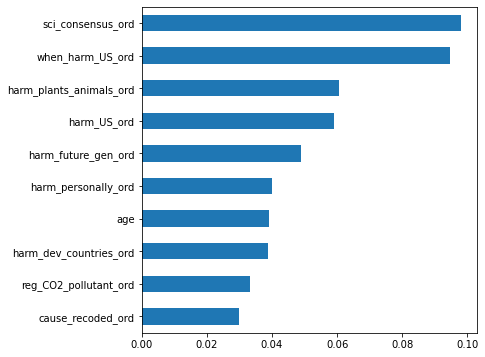

In [11]:
n_estimators = list(range(10,250,10))
max_depth = list(range(1, 25, 2)) 
rfscore2(X_train, X_test, y_train, y_test,n_estimators,max_depth)

In [19]:
def decision_tree_score(X_train, X_test, y_train, y_test,max_depth):
    cv_kf = KFold(n_splits=10,
                  shuffle=True,
                  random_state=30113)

#     clf = DecisionTreeClassifier(random_state=42)
    y_test= y_test.values.ravel()
    y_train = y_train.values.ravel()
#     tree_param = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
    
    dt_params = {
            'criterion':['gini','entropy'],
             'max_depth':max_depth}   # parameters for grid search
    
    rf_gs = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, verbose=1, n_jobs=-1)
    
#     base_scores_1 = cross_val_score(clf, X_train,y_train, cv=cv_kf)


#     print("DT: {:.2f} +/- {:.2f}".format(base_scores_1.mean(), 
#                                          2 * base_scores_1.std()))

    rf_gs.fit(X_train,y_train)
#     clf.fit(X_train,y_train)
#     preds_decision =clf.predict(X_test)
#     print("Confusion matrix for DecisionTreeClassifier")
#     print(confusion_matrix(y_test,preds_decision))
#     print(classification_report(y_test,preds_decision))
#     print(accuracy_score(y_test, preds_decision))
    print('GridSearch results')
    print('The best parameters on the training data are:\n',rf_gs.best_params_) # printing the best parameters
    max_depth_best = rf_gs.best_params_['max_depth']      # getting the best max_depth
    criterion_best = rf_gs.best_params_['criterion']  # getting the best n_estimators
    print("best max_depth:",max_depth_best)
#     print("best n_estimators:",n_estimators_best)
    best_rf_gs = DecisionTreeClassifier(max_depth=max_depth_best,criterion=criterion_best) # instantiate the best model
    
    score(best_rf_gs, 'Decision Tree', X_train, y_train)
    
    best_rf_gs.fit(X_train,y_train)  # fitting the best model

    preds = best_rf_gs.predict(X_test)
    print("")
    
    print("Confusion Matrix:\n")
    print(confusion_matrix(y_test,preds))
    print(classification_report(y_test,preds))
    print(accuracy_score(y_test, preds))

    
    print('Features and their importance:\n')
    feature_importances = pd.Series(best_rf_gs.feature_importances_, index=X_train.columns).sort_values().tail(10)
    print(feature_importances.plot(kind="barh", figsize=(6,6)))
    return


Fitting 5 folds for each of 24 candidates, totalling 120 fits
GridSearch results
The best parameters on the training data are:
 {'criterion': 'entropy', 'max_depth': 5}
best max_depth: 5
Decision Tree Score: 0.77 +- 0.014

Confusion Matrix:

[[  67   81  571]
 [  24  432  266]
 [  23   57 2904]]
              precision    recall  f1-score   support

  Don't know       0.59      0.09      0.16       719
          No       0.76      0.60      0.67       722
         Yes       0.78      0.97      0.86      2984

    accuracy                           0.77      4425
   macro avg       0.71      0.55      0.56      4425
weighted avg       0.74      0.77      0.72      4425

0.7690395480225989
Features and their importance:

AxesSubplot(0.125,0.125;0.775x0.755)


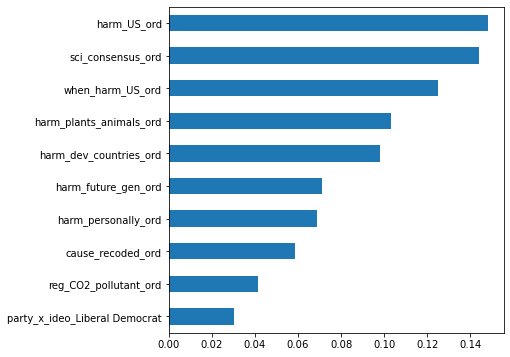

In [20]:
n_estimators = list(range(4,250,10))
max_depth = list(range(1, 25, 2)) 
decision_tree_score(X_train, X_test, y_train, y_test,max_depth)

In [44]:
def bagging_score(base_model,X_train, X_test, y_train, y_test,max_features,n_estimators):
    cv_kf = KFold(n_splits=10,
                  shuffle=True,
                  random_state=30113)
    y_test= y_test.values.ravel()
    y_train = y_train.values.ravel()
    dt_params = {
            'n_estimators':n_estimators,
            'max_features':max_features}   # parameters for grid search
    
    bagger = BaggingClassifier(base_estimator=base_model, random_state=42)
    rf_gs = GridSearchCV(bagger, dt_params, cv=5, verbose=1, n_jobs=-1)
    rf_gs.fit(X_train,y_train)
    print('GridSearch results for base estimator {}'.format(base_model))
    print('The best parameters on the training data are:\n',rf_gs.best_params_) # printing the best parameters
    max_features_best = rf_gs.best_params_['max_features']      # getting the best max_depth
    n_estimators_best = rf_gs.best_params_['n_estimators']  # getting the best n_estimators
    print("best max_features:",max_features_best)
    print("best n_estimators:",n_estimators_best)
    best_rf_gs = BaggingClassifier(base_estimator=base_model,max_features=max_features_best,n_estimators=n_estimators_best) # instantiate the best model
    
    score(best_rf_gs, 'Bagger', X_train, y_train)
    
    best_rf_gs.fit(X_train,y_train)  # fitting the best model

    preds = best_rf_gs.predict(X_test)
    print("")
    
    print("Confusion Matrix:\n")
    print(confusion_matrix(y_test,preds))
    print(classification_report(y_test,preds))
    print(accuracy_score(y_test, preds))

    
#     print('Features and their importance:\n')
#     feature_importances = pd.Series(best_rf_gs.feature_importances_, index=X_train.columns).sort_values().tail(10)
#     print(feature_importances.plot(kind="barh", figsize=(6,6)))
#     return


In [ ]:
n_estimators = list(range(10,250,10))
max_features = list(range(3, 81)) 
bagging_score(DecisionTreeClassifier(),X_train, X_test, y_train, y_test,n_estimators,max_features)

Fitting 5 folds for each of 1872 candidates, totalling 9360 fits
